## 15 Huffman

Este algoritmo optimiza la compresion de una cadena de texto. Para poder ejecutarlo necesitaremos la siguiente implementacion de un min-heap

In [1]:
mutable struct Node
    char::Union{Char,Nothing}
    freq::Int
    left::Union{Node,Nothing}
    right::Union{Node,Nothing}
end

mutable struct Heap
    array::Vector{Node}
    heap_size::Int
end

parent(i::Int) = floor(Int, i / 2)

left(i::Int) = 2 * i

right(i::Int) = 2 * i + 1

function min_heapify(A::Heap, i::Int)
    l = left(i)
    r = right(i)
    smallest::Int = i
    if l <= A.heap_size && A.array[l].freq < A.array[smallest].freq
        smallest = l
    end
    if r <= A.heap_size && A.array[r].freq < A.array[smallest].freq
        smallest = r
    end
    if smallest != i
        aux::Node = A.array[smallest]
        A.array[smallest] = A.array[i]
        A.array[i] = aux
        min_heapify(A, smallest)
    end
end

function build_min_heap(A::Heap)
    A.heap_size = length(A.array)
    i = floor(Int, A.heap_size / 2)
    while i > 0
        min_heapify(A, i)
        i = i - 1
    end
end

function heap_extract_min(A::Heap)
    min::Node = A.array[1]
    A.array[1] = A.array[A.heap_size]
    A.heap_size = A.heap_size - 1
    min_heapify(A, 1)
    return min
end

function heap_decrease_key(A::Heap, i::Int, key::Node)
    A.array[i] = key
    while i > 1 && A.array[parent(i)].freq > A.array[i].freq
        aux::Node = A.array[parent(i)]
        A.array[parent(i)] = A.array[i]
        A.array[i] = aux
        i = parent(i)
    end
end

function min_heap_insert(A::Heap, key::Node)
    A.heap_size = A.heap_size + 1
    heap_decrease_key(A, A.heap_size, key)
end

min_heap_insert (generic function with 1 method)

### 15.1 Algoritmo

In [3]:
function count_freq(str::String)
    dct = Dict{Char,Int}()
    for chr in str
        if !haskey(dct, chr)
            dct[chr] = 1
        else
            dct[chr] += 1
        end
    end
    return dct
end

function huffman(table::Dict)
    A = Heap([Node(chr, frq, nothing, nothing) for (chr, frq) in table], 0)
    build_min_heap(A)
    while A.heap_size > 1
        left = heap_extract_min(A)
        right = heap_extract_min(A)
        min_heap_insert(A, Node(nothing, left.freq + right.freq, left, right))
    end
    return heap_extract_min(A)
end


function printencoding(node::Union{Node,Nothing}, code::String)
    if isnothing(node)
        return
    end

    if !isnothing(node.char)
        println(node.char == ' ' ? "_" : node.char, "  ", code)
    end
    printencoding(node.left, code * "0")
    printencoding(node.right, code * "1")
end

const msg = "aaaaabbbbbbbbbccccccccccccdddddddddddddeeeeeeeeeeeeeeeefffffffffffffffffffffffffffffffffffffffffffff"

printencoding(huffman(count_freq(msg)), "")

f  0
c  100
d  101
a  1100
b  1101
e  111


### 15.2 Verificación

$Lema$: Sea $C$ un alfabeto en donde cada  $c \in C$ tiene una frecuencia $c.freq$. Sea $x$ y $y$ los dos caracteres de $C$ teniendo las frecuencias mas pequeñas. Entonces existe una codificacion prejifa optima para $C$ en donde las codigos de $x$ y $y$ tienen la misma longitud y difieren solo en el ultimo bit.

$Lema$: Sea $C'$ el alfabeto $C$ con los caracteres $x$ y $y$ removidos y un nuevo caracter $z$ agregado, tal que $C' = C - \{x, y\} \cup \{z\}$. Se define $freq$ de los caracteres de $C'$ de la misma forma a los de $C$ excepto que $z.freq = x.freq + y.freq$. Sea $T'$ cualquier arbol que representa una codificacion prejifa optima para $C'$. Entonces el arbol $T$, obtenido de $T'$ remplazando el nodo hoja $z$ por un nodo interno teniendo $x$ y $y$ como hijos, representa una codificacion prejifa optima para $C$.

Apartir de estos dos lemas podemos ver directamente que el algoritmo de huffman es correcto. $A$ representa un min-heap de arboles, en cada iteracion se eligen dos pares por lo tanto una vez que el heap tenga tamaño uno termina su ejecucion. En cada iteracion iteracion se toman los caracteres con menor frecuencia y se unen insertando un nodo en el heap que es padre de estos dos, por lo tanto en la codificacion final estos dos caracteres diferenciaran solo en su ultimo bit. Este proceso se repite hasta optener un solo arbol, y el por el segundo lema este va a ser una codificacion prefija optima.

### 15.3 Análisis del tiempo de ejecución

La primera linea se ejecuta en $\Theta(n)$, solo carga las frecuencias del texto a cifrar. La segunda linea es $O(n)$. Las demas operaciones en el heap cuestan $O(\lg n)$, como el while loop se ejecuta $n$ veces, entonces la complejidad total del algoritmo es $O(n \lg n)$.

### 15.4 Experimentación en el tiempo de ejecución

In [7]:
using BenchmarkTools
using Random
using Plots

Vamos a realizar 20 ejecuciones del algoritmo con strings aleatorias de tamaño $k = 1, 2, \dots, 20$.

In [9]:
A = [@belapsed huffman(count_freq(randstring($i))) for i in 1:20] * 10^9

20-element Vector{Float64}:
  291.8918918918919
  367.8048780487805
  457.8680203045685
  549.7326203208556
  640.2439024390244
  751.2820512820513
  847.457627118644
  933.3333333333334
 1030.0
 1110.0
 1310.0
 1500.0
 1760.0
 1877.7777777777778
 2044.4444444444443
 2155.5555555555557
 2266.6666666666665
 2388.8888888888887
 2500.0
 2577.777777777778

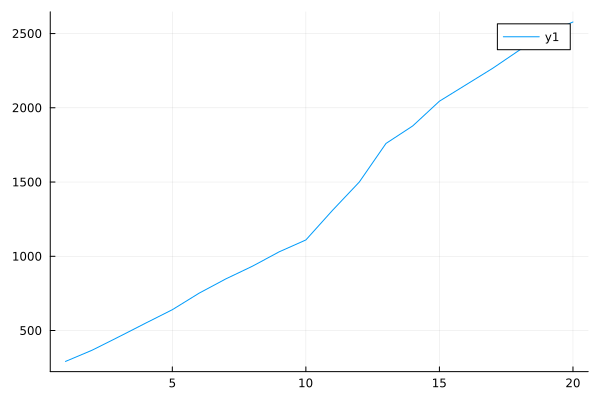

In [10]:
plot(A)